# 08. Deployment

### Importando as bibliotecas

In [1]:
import sys
import warnings
sys.path.append('..')
import yfinance as yF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts

### Definindo os parâmetros do modelo

In [2]:
TICKER = 'ROXO34.SA' # Definindo o ticker da ação
DIAS_POSTERIORES = 180 # Definindo o período de simulações
SIMULACOES = 2500 # Definindo a quantidade de simulações

### Lendo o dataset

In [3]:
df = yF.Ticker(TICKER).history(period='1y') # Armazenando o dataset pelo código do ticker e o período em uma variável

In [4]:
pd.options.display.float_format = '{:.2f}'.format # Formatando os dados do dataset com 2 casas decimais

In [5]:
display(df.head(3)) # Exibindo as 3 primeiras linhas do dataset

display(df.tail(3)) # Exibindo as 3 últimas linhas do dataset

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-29 00:00:00-03:00,6.68,6.89,6.68,6.77,4225593,0.00,0.00
2023-11-30 00:00:00-03:00,6.80,6.95,6.69,6.88,3691849,0.00,0.00
2023-12-01 00:00:00-03:00,6.77,6.87,6.72,6.87,5477345,0.00,0.00


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-27 00:00:00-03:00,13.53,13.54,13.16,13.19,5362992,0.00,0.00
2024-11-28 00:00:00-03:00,13.19,13.23,12.59,12.67,1881661,0.00,0.00
2024-11-29 00:00:00-03:00,13.01,13.15,12.34,12.50,6179191,0.00,0.00


In [6]:
df.shape # Visualizando a quantidade de linhas e colunas do dataset

(252, 7)

In [7]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-11-29 00:00:00-03:00 to 2024-11-29 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


In [8]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,252.00,252.00,252.00,252.00,252.00,252.00,252.00
mean,10.58,10.76,10.40,10.59,3771111.09,0.00,0.00
std,2.34,2.38,2.28,2.32,3005193.28,0.00,0.00
min,6.68,6.78,6.66,6.68,795018.00,0.00,0.00
25%,9.11,9.29,8.97,9.14,2006314.00,0.00,0.00
50%,10.31,10.47,10.09,10.32,2900660.50,0.00,0.00
75%,12.52,12.87,12.34,12.53,4618644.50,0.00,0.00
max,15.34,15.80,15.08,15.40,23823180.00,0.00,0.00


In [9]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [10]:
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning) # Ignorando os warnings do tipo SettingWithCopyWarning

In [11]:
df = df.drop([
    'Stock Splits',
    'Dividends',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas

In [12]:
retorno_diario = df['Close'].pct_change().dropna() # Criando um dataset com as variações diárias

retorno_diario.head() # Exibindo o dataset criado

Date
2023-11-30 00:00:00-03:00    0.02
2023-12-01 00:00:00-03:00   -0.00
2023-12-04 00:00:00-03:00   -0.01
2023-12-05 00:00:00-03:00    0.00
2023-12-06 00:00:00-03:00   -0.01
Name: Close, dtype: float64

In [13]:
df = pd.merge(df, retorno_diario, how='inner', on='Date') # Unificando o dataset original com o dataset com as variações diárias

df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Variation'] # Ajustando os nomes das colunas

df # Exibindo o dataset atualizado

,Open,High,Low,Close,Volume,Daily Variation
Date,,,,,,
2023-11-30 00:00:00-03:00,6.80,6.95,6.69,6.88,3691849,0.02
2023-12-01 00:00:00-03:00,6.77,6.87,6.72,6.87,5477345,-0.00
2023-12-04 00:00:00-03:00,6.81,6.87,6.77,6.81,2317765,-0.01
2023-12-05 00:00:00-03:00,6.83,6.90,6.78,6.84,4391147,0.00
2023-12-06 00:00:00-03:00,6.82,6.84,6.75,6.79,5531113,-0.01
...,...,...,...,...,...,...
2024-11-25 00:00:00-03:00,13.60,13.64,13.12,13.64,2160453,0.01
2024-11-26 00:00:00-03:00,13.59,13.97,13.39,13.39,2207413,-0.02
2024-11-27 00:00:00-03:00,13.53,13.54,13.16,13.19,5362992,-0.01


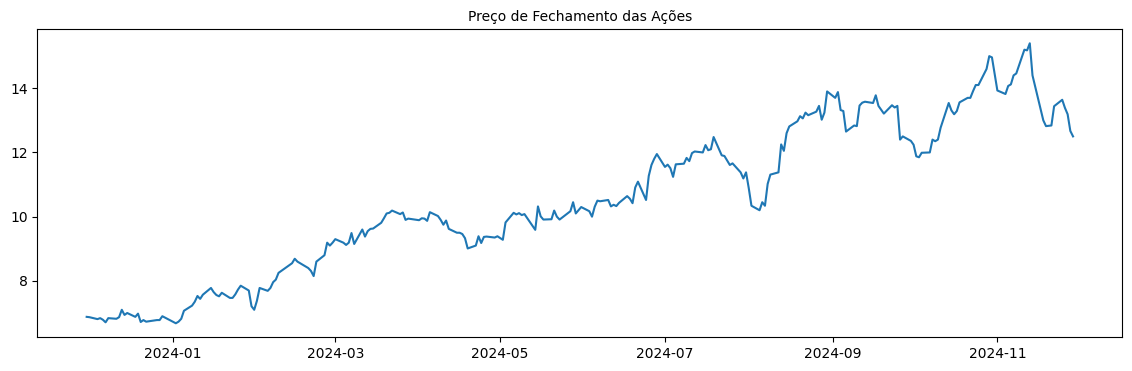

In [14]:
fig, ax = plt.subplots(figsize=(14,4)) # Definindo o tamanho da figura
plt.plot(df['Close']) # Passando os dados a serem plotados no gráfico
plt.title('Preço de Fechamento das Ações', size = 10) # Exibindo o título do gráfico
plt.show() # Exibindo o gráfico

In [15]:
retorno_diario_acumulado = (1 - retorno_diario).cumprod() - 1 # Definindo o retorno diário acumulado

retorno_diario_acumulado.max() # Exibindo o máximo do retorno acumulado

0.008382969959386255

In [16]:
media_retorno_diario = np.mean(retorno_diario)
desvio_retorno_diario = np.std(retorno_diario)

print('Média do Retorno de Fechamento:', media_retorno_diario)
print('Desvio Padrão do Retorno de Fechamento:', desvio_retorno_diario)

Média do Retorno de Fechamento: 0.0027573442864667445
Desvio Padrão do Retorno de Fechamento: 0.024942757485598245


In [17]:
print('Retorno Médio Anualizado de Fechamento:', (1 + media_retorno_diario) ** 252 - 1)
print('Desvio Padrão Anualizado de Fechamento:', desvio_retorno_diario *np.sqrt(252))

Retorno Médio Anualizado de Fechamento: 1.0014952898554972
Desvio Padrão Anualizado de Fechamento: 0.3959539999145261


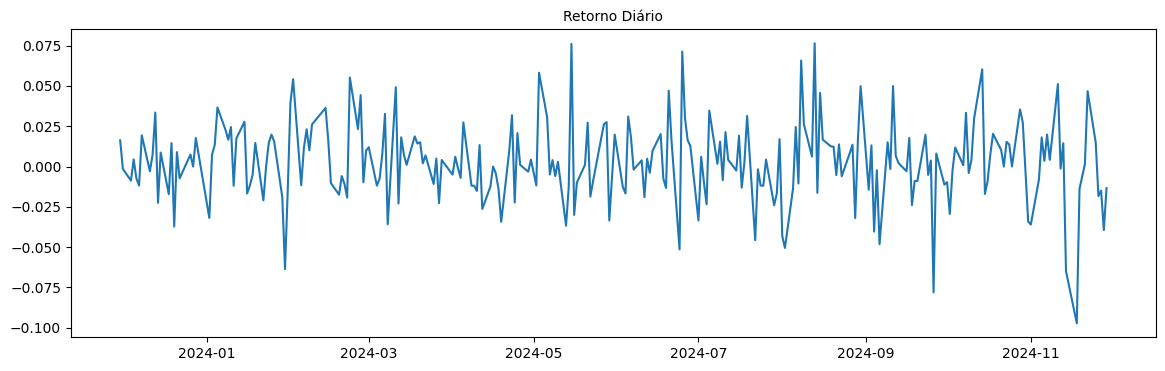

In [18]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(retorno_diario)
plt.title('Retorno Diário', size = 10)
plt.show()

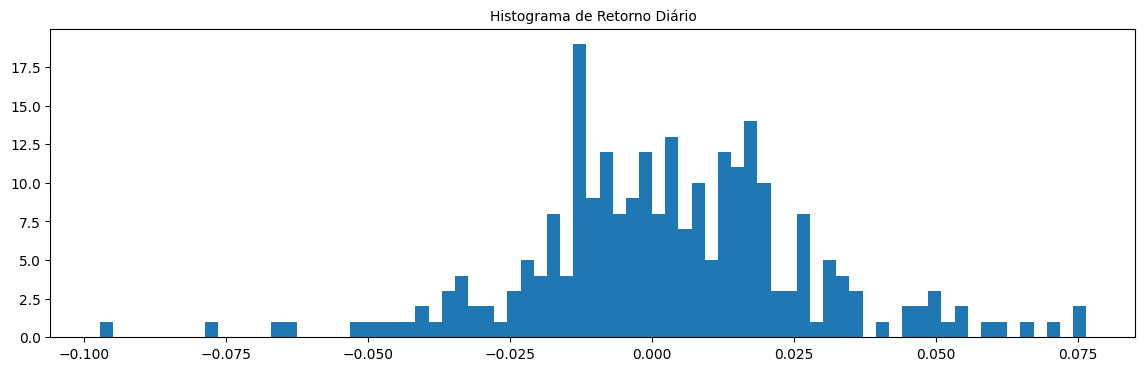

In [19]:
fig, ax = plt.subplots(figsize=(14,4))
plt.hist(retorno_diario, bins=75)
plt.title('Histograma de Retorno Diário', size = 10)
plt.show()

In [20]:
log_retorno_diario = (np.log(df['Close']) - np.log(df['Close']).shift(-1)).dropna()

log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

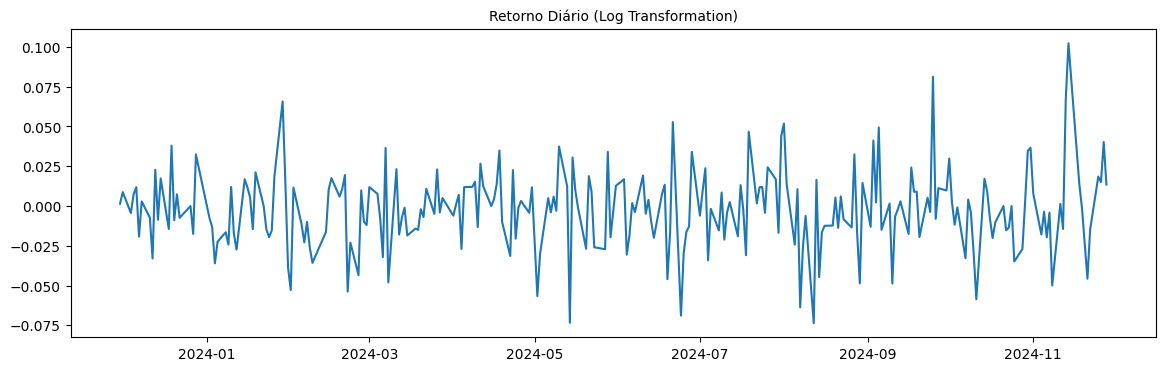

In [21]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(log_retorno_diario)
plt.title('Retorno Diário (Log Transformation)', size = 10)
plt.show()

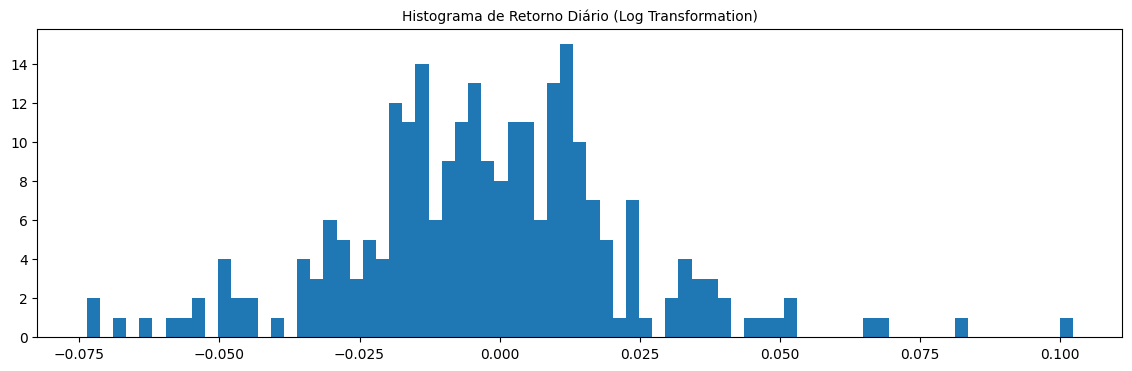

In [22]:
fig, ax = plt.subplots(figsize=(14,4))
plt.hist(log_retorno_diario, bins=75)
plt.title('Histograma de Retorno Diário (Log Transformation)', size = 10)
plt.show()

In [23]:
var_level = 95
var = np.percentile(log_retorno_diario, 100-var_level)
print(f'Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.')
print('VAR 95%:', var)

Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.
VAR 95%: -0.04582550539406567


In [24]:
var * np.sqrt(5)

-0.10246894516441414

In [25]:
var_level = 95
var = np.percentile(log_retorno_diario, 100-var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print(f'Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.')
print('CVAR 95%:', cvar)

Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.
CVAR 95%: -0.05711223315609571


In [26]:
dias_posteriores = DIAS_POSTERIORES

simulacoes = SIMULACOES

ultimo_preco = df['Close'].iloc[-1]

results = np.empty((simulacoes, dias_posteriores))

for s in range(simulacoes):
    
    random_returns = 1 + np.random.normal(
        loc = log_media_retorno_diario, 
        scale = log_desvio_retorno_diario,
        size = dias_posteriores
    )

    result = ultimo_preco * (random_returns.cumprod())

    results[s, :] = result

In [27]:
index = pd.date_range('2024-11-26', periods=dias_posteriores, freq='D')
resultados = pd.DataFrame(results.T, index=index)
media_resultados = resultados.apply('mean', axis=1)

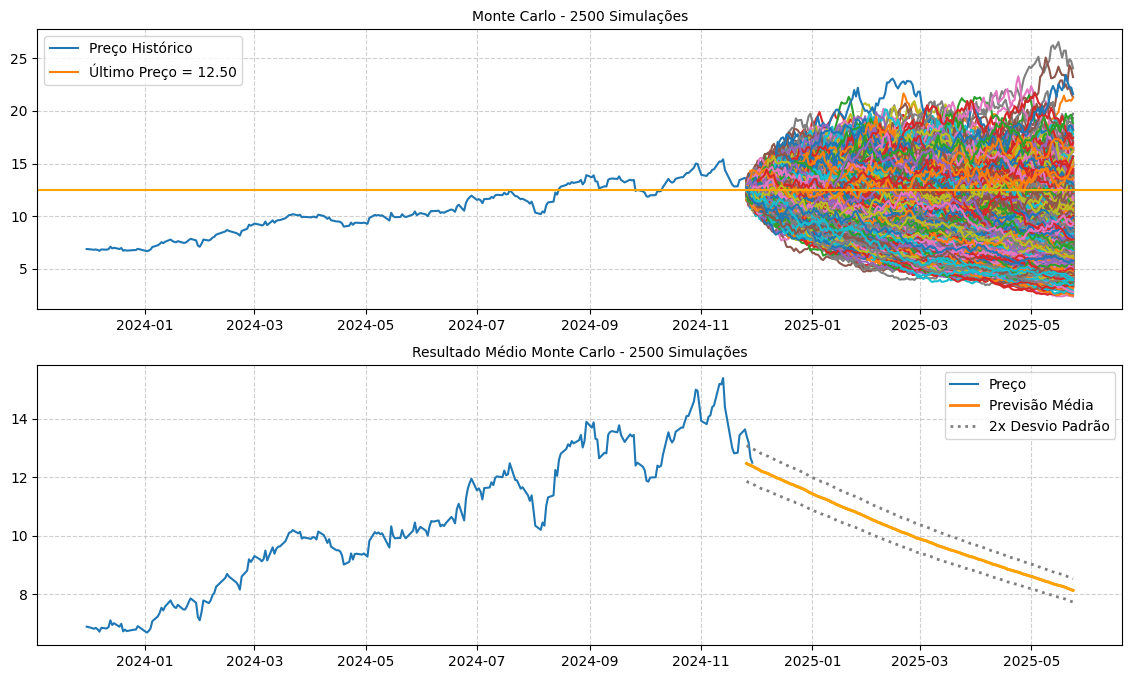

In [28]:
fig, ax = plt.subplots(figsize=(14,8), nrows=2, ncols=1)

ax[0].plot(df['Close'])
ax[0].plot(resultados)
ax[0].axhline(ultimo_preco, c='orange')
ax[0].set_title(f'Monte Carlo - {simulacoes} Simulações', size=10)
ax[0].legend(['Preço Histórico', f'Último Preço = {ultimo_preco:.2f}'])
ax[0].grid(True, linestyle='--', alpha=0.6)

ax[1].plot(df['Close'])
ax[1].plot(resultados.apply('mean', axis=1), lw=2)
ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), lw=2, linestyle = 'dotted', c='gray')
ax[1].plot(media_resultados, lw=2, c='orange')
ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), lw=2, linestyle = 'dotted', c='gray')
ax[1].set_title(f'Resultado Médio Monte Carlo - {simulacoes} Simulações', size=10)
ax[1].legend(['Preço', 'Previsão Média', '2x Desvio Padrão'])
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.show()